### **Import the necessary libraries**

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import scipy.stats as stats

from sklearn.model_selection import GridSearchCV


import warnings
warnings.filterwarnings('ignore')

### **Reading the dataset**

In [59]:
df1 = pd.read_csv("Traveldata_train.csv")

In [60]:
data1 = df1.copy()

In [61]:
data1.head()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
0,98800001,Female,Loyal Customer,52.0,NaN,Business,272,0.0,5.0
1,98800002,Male,Loyal Customer,48.0,Personal Travel,Eco,2200,9.0,0.0
2,98800003,Female,Loyal Customer,43.0,Business Travel,Business,1061,77.0,119.0
3,98800004,Female,Loyal Customer,44.0,Business Travel,Business,780,13.0,18.0
4,98800005,Female,Loyal Customer,50.0,Business Travel,Business,1981,0.0,0.0


In [62]:
data1.tail()

,ID,Gender,Customer_Type,Age,Type_Travel,Travel_Class,Travel_Distance,Departure_Delay_in_Mins,Arrival_Delay_in_Mins
94374,98894375,Male,Loyal Customer,32.0,Business Travel,Business,1357,83.0,125.0
94375,98894376,Male,Loyal Customer,44.0,Business Travel,Business,592,5.0,11.0
94376,98894377,Male,NaN,63.0,Business Travel,Business,2794,0.0,0.0
94377,98894378,Male,Loyal Customer,16.0,Personal Travel,Eco,2744,0.0,0.0
94378,98894379,Male,Loyal Customer,54.0,NaN,Eco,2107,28.0,28.0


### **Checking the data types of the columns**

In [63]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 6.5+ MB


### **Checking for missing values**

In [64]:
missing_values = data.isnull().sum()
missing_values.sort_values(ascending=False)

Type_Travel                9226
Customer_Type              8951
Arrival_Delay_in_Mins       357
Gender                       77
Departure_Delay_in_Mins      57
Age                          33
ID                            0
Travel_Class                  0
Travel_Distance               0
dtype: int64

In [65]:
share_missing_values = missing_values/data.isnull().count()
share_missing_values.sort_values(ascending=False)

Type_Travel                0.097755
Customer_Type              0.094841
Arrival_Delay_in_Mins      0.003783
Gender                     0.000816
Departure_Delay_in_Mins    0.000604
Age                        0.000350
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
dtype: float64

In [66]:
df2 =pd.read_csv("Surveydata_train.csv")

In [67]:
data2 =df2.copy()

In [68]:
data2.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [69]:
data2.tail()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good
94378,98894379,0,Acceptable,Ordinary,Poor,Acceptable,Manageable,Acceptable,Acceptable,Acceptable,Acceptable,Poor,Good,Good,Poor,Good,Acceptable


In [70]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94379 entries, 0 to 94378
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ID                       94379 non-null  int64 
 1   Overall_Experience       94379 non-null  int64 
 2   Seat_Comfort             94318 non-null  object
 3   Seat_Class               94379 non-null  object
 4   Arrival_Time_Convenient  85449 non-null  object
 5   Catering                 85638 non-null  object
 6   Platform_Location        94349 non-null  object
 7   Onboard_Wifi_Service     94349 non-null  object
 8   Onboard_Entertainment    94361 non-null  object
 9   Online_Support           94288 non-null  object
 10  Ease_of_Online_Booking   94306 non-null  object
 11  Onboard_Service          86778 non-null  object
 12  Legroom                  94289 non-null  object
 13  Baggage_Handling         94237 non-null  object
 14  CheckIn_Service          94302 non-nul

In [71]:
missing_values2 = data2.isnull().sum()
missing_values2.sort_values(ascending=False)

Arrival_Time_Convenient    8930
Catering                   8741
Onboard_Service            7601
Baggage_Handling            142
Online_Support               91
Legroom                      90
CheckIn_Service              77
Ease_of_Online_Booking       73
Seat_Comfort                 61
Platform_Location            30
Onboard_Wifi_Service         30
Onboard_Entertainment        18
Cleanliness                   6
Online_Boarding               6
Overall_Experience            0
Seat_Class                    0
ID                            0
dtype: int64

In [72]:
share_missing_values2 = missing_values2/data2.isnull().count()
share_missing_values2.sort_values(ascending=False)

Arrival_Time_Convenient    0.094619
Catering                   0.092616
Onboard_Service            0.080537
Baggage_Handling           0.001505
Online_Support             0.000964
Legroom                    0.000954
CheckIn_Service            0.000816
Ease_of_Online_Booking     0.000773
Seat_Comfort               0.000646
Platform_Location          0.000318
Onboard_Wifi_Service       0.000318
Onboard_Entertainment      0.000191
Cleanliness                0.000064
Online_Boarding            0.000064
Overall_Experience         0.000000
Seat_Class                 0.000000
ID                         0.000000
dtype: float64

# Joining two tables

In [73]:
df = data1.merge(data2, on='ID',how='left')

In [74]:
df.head().T

,0,1,2,3,4
ID,98800001,98800002,98800003,98800004,98800005
Gender,Female,Male,Female,Female,Female
Customer_Type,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer,Loyal Customer
Age,52.0,48.0,43.0,44.0,50.0
Type_Travel,NaN,Personal Travel,Business Travel,Business Travel,Business Travel
Travel_Class,Business,Eco,Business,Business,Business
Travel_Distance,272,2200,1061,780,1981
Departure_Delay_in_Mins,0.0,9.0,77.0,13.0,0.0
Arrival_Delay_in_Mins,5.0,0.0,119.0,18.0,0.0
Overall_Experience,0,0,1,0,1


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       94379 non-null  int64  
 1   Gender                   94302 non-null  object 
 2   Customer_Type            85428 non-null  object 
 3   Age                      94346 non-null  float64
 4   Type_Travel              85153 non-null  object 
 5   Travel_Class             94379 non-null  object 
 6   Travel_Distance          94379 non-null  int64  
 7   Departure_Delay_in_Mins  94322 non-null  float64
 8   Arrival_Delay_in_Mins    94022 non-null  float64
 9   Overall_Experience       94379 non-null  int64  
 10  Seat_Comfort             94318 non-null  object 
 11  Seat_Class               94379 non-null  object 
 12  Arrival_Time_Convenient  85449 non-null  object 
 13  Catering                 85638 non-null  object 
 14  Platform_Location     

In [76]:
share_missing_values = missing_values/df.isnull().count()
share_missing_values.sort_values(ascending=False)

Type_Travel                0.097755
Customer_Type              0.094841
Arrival_Delay_in_Mins      0.003783
Gender                     0.000816
Departure_Delay_in_Mins    0.000604
Age                        0.000350
ID                         0.000000
Travel_Class               0.000000
Travel_Distance            0.000000
Arrival_Time_Convenient         NaN
Baggage_Handling                NaN
Catering                        NaN
CheckIn_Service                 NaN
Cleanliness                     NaN
Ease_of_Online_Booking          NaN
Legroom                         NaN
Onboard_Entertainment           NaN
Onboard_Service                 NaN
Onboard_Wifi_Service            NaN
Online_Boarding                 NaN
Online_Support                  NaN
Overall_Experience              NaN
Platform_Location               NaN
Seat_Class                      NaN
Seat_Comfort                    NaN
dtype: float64

### **Converting the data types**

In [77]:
cols = df.select_dtypes(['object']).columns.tolist()
#adding target variable to this list as this is an classification problem and the target variable is categorical
cols.append('Overall_Experience')

In [78]:
cols

['Gender',
 'Customer_Type',
 'Type_Travel',
 'Travel_Class',
 'Seat_Comfort',
 'Seat_Class',
 'Arrival_Time_Convenient',
 'Catering',
 'Platform_Location',
 'Onboard_Wifi_Service',
 'Onboard_Entertainment',
 'Online_Support',
 'Ease_of_Online_Booking',
 'Onboard_Service',
 'Legroom',
 'Baggage_Handling',
 'CheckIn_Service',
 'Cleanliness',
 'Online_Boarding',
 'Overall_Experience']

In [79]:
# Changing the data type of object type column to category. hint use astype() function
for i in cols:
    df[i] = df[i].astype('category')

In [80]:
# Checking the info again and the datatype of different variable
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94379 entries, 0 to 94378
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ID                       94379 non-null  int64   
 1   Gender                   94302 non-null  category
 2   Customer_Type            85428 non-null  category
 3   Age                      94346 non-null  float64 
 4   Type_Travel              85153 non-null  category
 5   Travel_Class             94379 non-null  category
 6   Travel_Distance          94379 non-null  int64   
 7   Departure_Delay_in_Mins  94322 non-null  float64 
 8   Arrival_Delay_in_Mins    94022 non-null  float64 
 9   Overall_Experience       94379 non-null  category
 10  Seat_Comfort             94318 non-null  category
 11  Seat_Class               94379 non-null  category
 12  Arrival_Time_Convenient  85449 non-null  category
 13  Catering                 85638 non-null  category
 14  Platfo

# Descriptive Analysis

### **Analyzing Summary Statistics of the dataset**

In [107]:
df.drop(columns=['ID'],inplace=True)

In [108]:
df.columns

Index(['Gender', 'Customer_Type', 'Age', 'Type_Travel', 'Travel_Class',
       'Travel_Distance', 'Departure_Delay_in_Mins', 'Arrival_Delay_in_Mins',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [109]:
# Analyzing the summary statistics for numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,94346.0,39.419647,15.116632,7.0,27.0,40.0,51.0,85.0
Travel_Distance,94379.0,1978.888185,1027.961019,50.0,1359.0,1923.0,2538.0,6951.0
Departure_Delay_in_Mins,94322.0,14.647092,38.138781,0.0,0.0,0.0,12.0,1592.0
Arrival_Delay_in_Mins,94022.0,15.005222,38.439409,0.0,0.0,0.0,13.0,1584.0


In [110]:
df.describe(include=['category']).T

,count,unique,top,freq
Gender,94302,2,Female,47815
Customer_Type,85428,2,Loyal Customer,69823
Type_Travel,85153,2,Business Travel,58617
Travel_Class,94379,2,Eco,49342
Overall_Experience,94379,2,1,51593
Seat_Comfort,94318,6,Acceptable,21158
Seat_Class,94379,2,Green Car,47435
Arrival_Time_Convenient,85449,6,Good,19574
Catering,85638,6,Acceptable,18468
Platform_Location,94349,6,Manageable,24173


In [111]:
# Checking the count of unique values in each categorical column 
cols_cat= df.select_dtypes(['category'])

for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i])
    print('Nbr of missing values',cols_cat[i].isnull().sum())    
    print(cols_cat[i].value_counts())    
    print('*'*40)

Unique values in Gender are :
0        Female
1          Male
2        Female
3        Female
4        Female
          ...  
94374      Male
94375      Male
94376      Male
94377      Male
94378      Male
Name: Gender, Length: 94379, dtype: category
Categories (2, object): ['Female', 'Male']
Nbr of missing values 77
Female    47815
Male      46487
Name: Gender, dtype: int64
****************************************
Unique values in Customer_Type are :
0        Loyal Customer
1        Loyal Customer
2        Loyal Customer
3        Loyal Customer
4        Loyal Customer
              ...      
94374    Loyal Customer
94375    Loyal Customer
94376               NaN
94377    Loyal Customer
94378    Loyal Customer
Name: Customer_Type, Length: 94379, dtype: category
Categories (2, object): ['Disloyal Customer', 'Loyal Customer']
Nbr of missing values 8951
Loyal Customer       69823
Disloyal Customer    15605
Name: Customer_Type, dtype: int64
****************************************
Unique v

In [112]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots                                        
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize,                                        
                                           ) # creating the 2 subplots
    print(col)
    print('Skew :', round(cols_not_cat[col].skew(), 2))
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    plt.show()

In [113]:
cols_not_cat = df.select_dtypes(exclude=['category'])

In [114]:
cols_not_cat.columns

Index(['Age', 'Travel_Distance', 'Departure_Delay_in_Mins',
       'Arrival_Delay_in_Mins'],
      dtype='object')

Age
Skew : -0.0


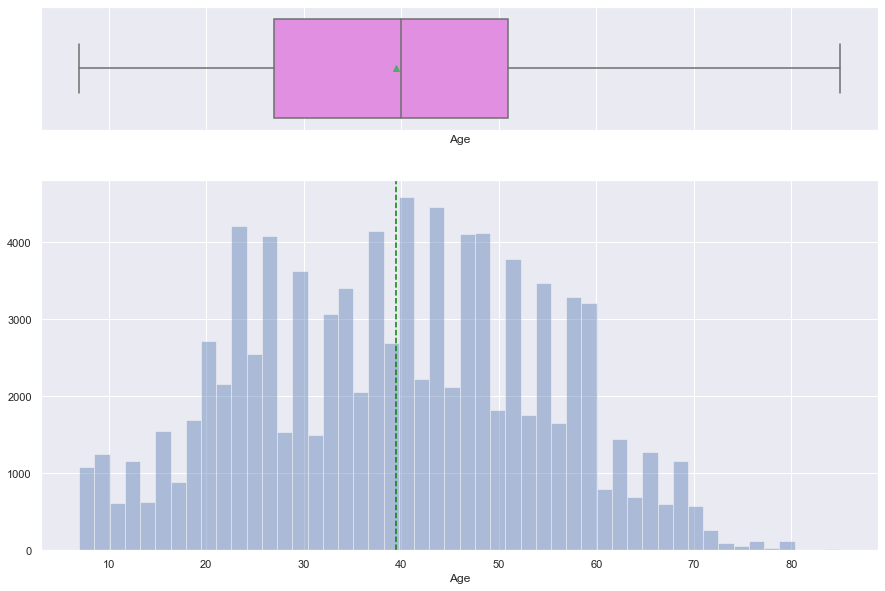

Travel_Distance
Skew : 0.47


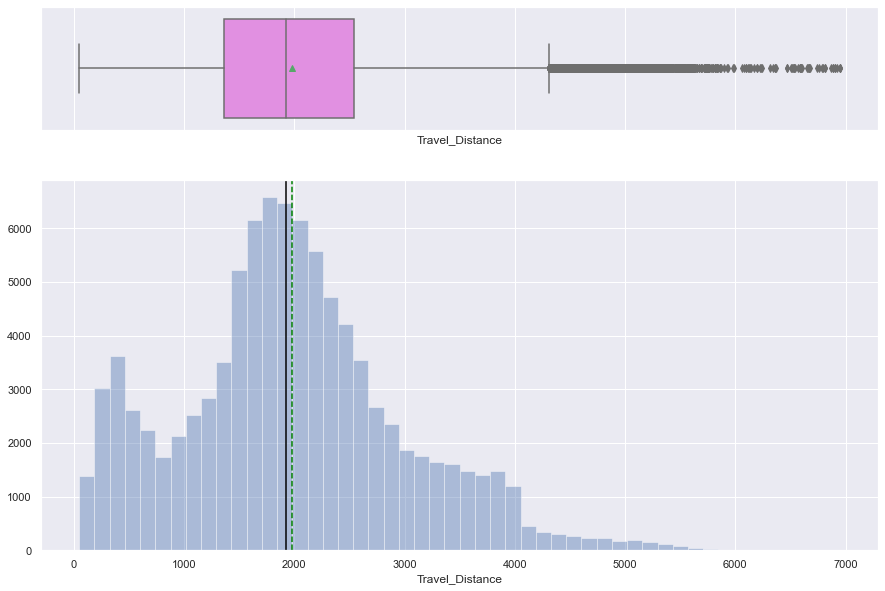

Departure_Delay_in_Mins
Skew : 7.16


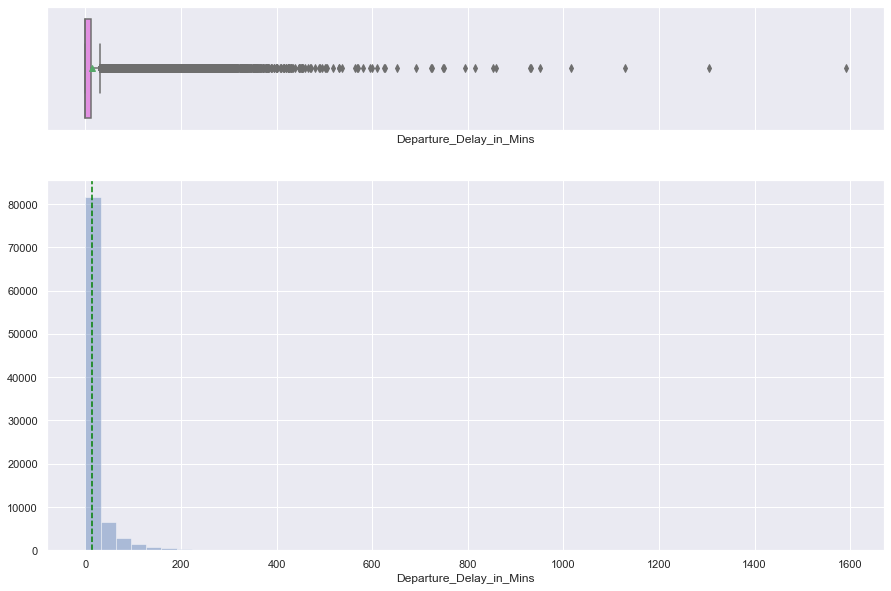

Arrival_Delay_in_Mins
Skew : 6.98


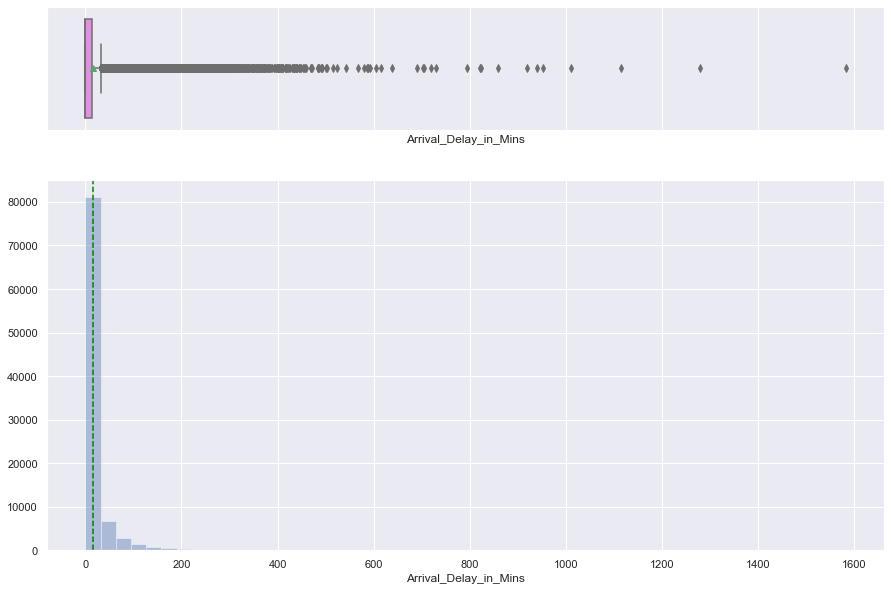

In [115]:
for col in cols_not_cat.columns:
    histogram_boxplot(cols_not_cat[col])

# Bivariate Analysis

In [116]:
independent_variables = df.loc[:,df.columns != 'Overall_Experience']

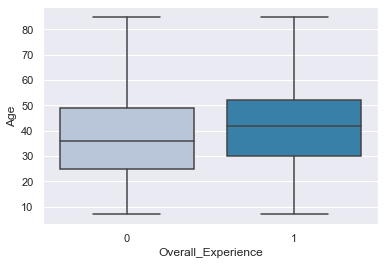

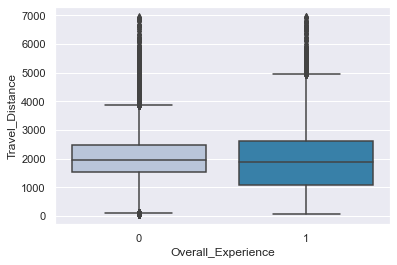

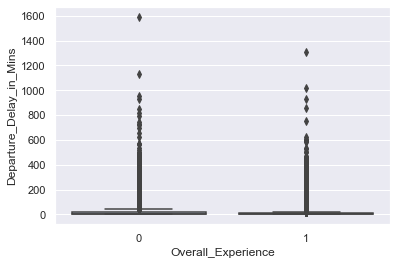

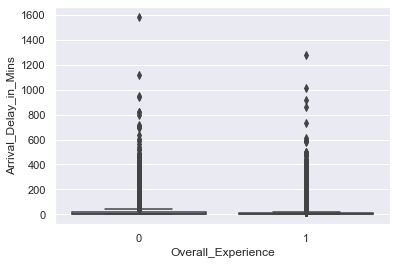

In [117]:
for col in cols_not_cat.columns:
    sns.boxplot(df["Overall_Experience"],cols_not_cat[col],palette="PuBu")
    plt.show()

In [118]:
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,df['Overall_Experience'],margins=True)
    tab2 = pd.crosstab(x,df['Overall_Experience'],margins=True,normalize='index')
    print(tab1)
    print(tab2)    
    print('-'*120)
    tab = pd.crosstab(x,df['Overall_Experience'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

In [120]:
cols_cat.columns

Index(['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class',
       'Overall_Experience', 'Seat_Comfort', 'Seat_Class',
       'Arrival_Time_Convenient', 'Catering', 'Platform_Location',
       'Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support',
       'Ease_of_Online_Booking', 'Onboard_Service', 'Legroom',
       'Baggage_Handling', 'CheckIn_Service', 'Cleanliness',
       'Online_Boarding'],
      dtype='object')

In [124]:
cols_cat_without_target_variable = cols_cat[['Gender', 'Customer_Type', 'Type_Travel', 'Travel_Class','Seat_Comfort', 'Seat_Class','Arrival_Time_Convenient', 'Catering', 'Platform_Location','Onboard_Wifi_Service', 'Onboard_Entertainment', 'Online_Support','Ease_of_Online_Booking', 'Onboard_Service', 'Legroom','Baggage_Handling', 'CheckIn_Service', 'Cleanliness','Online_Boarding']]

In [129]:
for col in independent_variables.columns:
    stacked_plot(independent_variables[col])
    plt.show()

KeyError: 'BAD'